# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


----

**TASK: Run the cell below to read in the data.**

In [5]:
df = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/ml lab 5/heart.csv')

In [6]:
df.head()tar

SyntaxError: invalid syntax (3177332140.py, line 1)

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
X = df.drop('target',axis=1)
y = df['target']

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [11]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model 

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_model = LogisticRegression()

In [14]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Coeffecients

**TASK: Report back the model's coefficients.**

In [15]:
coeff= log_model.coef_
print(np.array(coeff))


[[-0.07200459 -0.73512355  0.89380134 -0.26263404 -0.21252883  0.04626827
   0.12005867  0.4336183  -0.42815523 -0.5261547   0.38193418 -0.85118686
  -0.57463534]]


---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [17]:
y_pred = log_model.predict(scaled_X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.8387096774193549

In [19]:
confusion_matrix(y_test,y_pred)


array([[12,  3],
       [ 2, 14]], dtype=int64)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


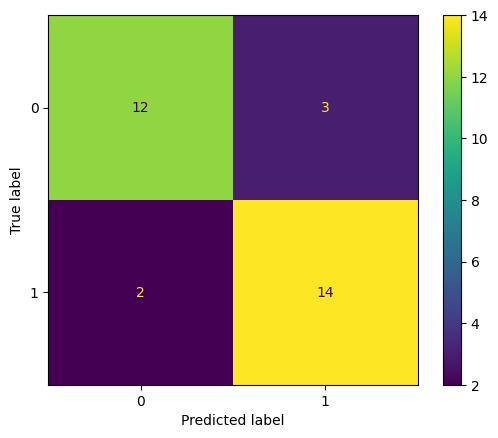

In [20]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


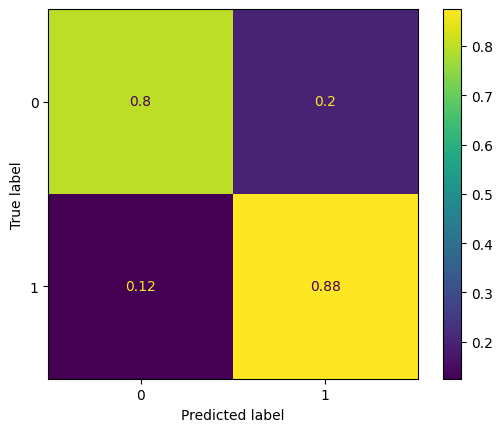

In [22]:
# Scaled so highest value=1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TASK: Create the ROC Curve.**

In [24]:
from sklearn.metrics import plot_roc_curve

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


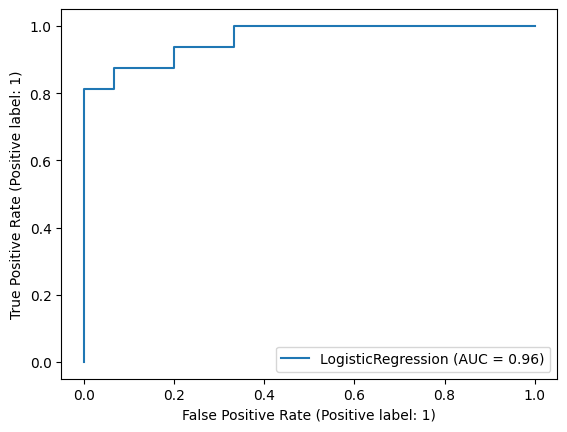

In [25]:
plot_roc_curve(log_model,scaled_X_test,y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [27]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [31]:
prediction=log_model.predict(patient)
probability=log_model.predict_proba(patient)

In [32]:
print(f"prediction: {'Heart Disease' if prediction[0] ==1 else 'No heart disease'}")
      
print(f"Model Confidence: {probability[0][prediction[0]]:.2%}")

prediction: No heart disease
Model Confidence: 100.00%


----

## Great Job!